## Problem 1

#### 1a. Plot Age Distribution (3 points)
Load the patient data

In [1]:
import xml.etree.ElementTree as et
tree = et.parse('hw1-patients.xml')
root = tree.getroot()

patients = []
for patient in root.findall('patients/patient'):
    name = patient.attrib.get('name')
    age = float(patient.attrib.get('age'))
    gender = patient.attrib.get('gender')
    patients.append({'name': name, 'age': age, 'gender': gender})

Plot a histogram showing the distribution of ages.<br>Determine if any patients share the same exact age. Provide evidence for your findings.

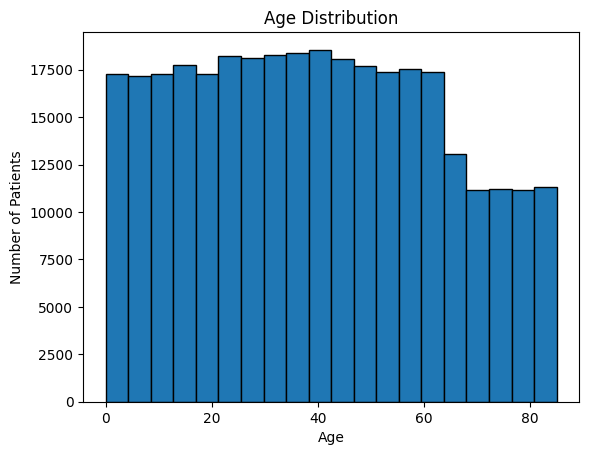

there is no patients share the same exact age


In [2]:
import matplotlib.pyplot as plt
ages = [patient['age'] for patient in patients]

plt.hist(ages, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

age_count = {}
for i in ages:
    if i in age_count:
        age_count[i] += 1
    else:
        age_count[i] = 1

for i in age_count.values():
    flag = True
    if i > 1:
        flag = False
        print('there is patients share the same exact age')
        break
if flag:    
    print('there is no patients share the same exact age')

How the existence of multiple patients with the same age affects the solution to the rest of the problem:<br>If there exist multiple patients with the same age, when we search for the biggest and second biggest number, there might be same number and for the exact age there might exist more than one patient with the same exact age, so that we might need to change the algorithm. 

1b. Plot Gender Distribution

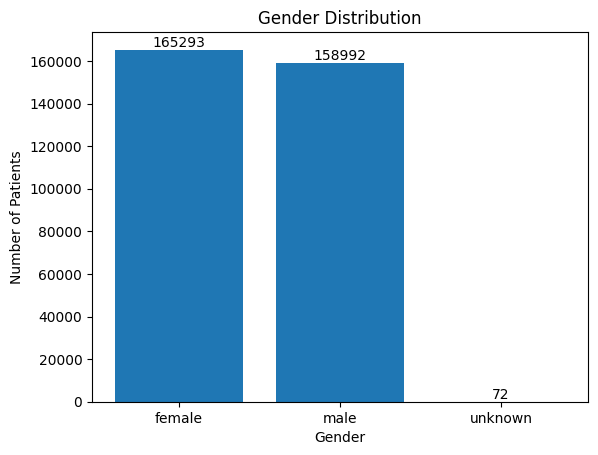

Gender categories: {'unknown', 'male', 'female'}


In [3]:
genders = [patient['gender'] for patient in patients]

# Plot gender distribution
gender_count = {}
for i in genders:
    if i in gender_count:
        gender_count[i] += 1
    else:
        gender_count[i] = 1

fig, ax = plt.subplots()
bars = ax.bar(gender_count.keys(), gender_count.values())
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
            ha='center', va='bottom')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

print(f"Gender categories: {set(genders)}")

1c. Sort Patients by Age

In [4]:
ages_sorted = sorted(patients, key=lambda x: x['age'])
oldest_patient = ages_sorted[-1]
print(ages_sorted[:10])
print(f"The oldest patient is {oldest_patient['name']} with Age: {oldest_patient['age']}")


[{'name': 'Timothy Larson', 'age': 0.00010629282758800596, 'gender': 'male'}, {'name': 'Lisa Dercole', 'age': 0.0008606743639882897, 'gender': 'female'}, {'name': 'Julia Clinton', 'age': 0.0011937231038899876, 'gender': 'female'}, {'name': 'Mauricio Pepin', 'age': 0.0022482004795970623, 'gender': 'male'}, {'name': 'Peter Blalock', 'age': 0.0025810199881115548, 'gender': 'male'}, {'name': 'John Cook', 'age': 0.0034623106935055548, 'gender': 'male'}, {'name': 'Cory Perez', 'age': 0.003525418257868118, 'gender': 'male'}, {'name': 'Melvin Garcia', 'age': 0.003675155813744335, 'gender': 'male'}, {'name': 'Diane Byrnes', 'age': 0.0037343175432164033, 'gender': 'female'}, {'name': 'David Norrington', 'age': 0.0037599777579760962, 'gender': 'male'}]
The oldest patient is Monica Caponera with Age: 84.99855742449432


1d. Find the Second Oldest Patient in O(n)

Sorting the list is O(nlog(n)). So instead of sorting the data, we travel through the whole list and initially set 2 variable that store the biggest and second biggest elements we currently have. When travel is done we can have our biggest and second biggest number of the list.  


Sorting number not only can give us the biggest number but all order of all number. When we need the sequence or some random middle big number's order, sorting would be much more efficient than O(n) solution.

In [5]:
b,sb = -9999,-9999
bn,sbn = 0,0
for i in patients:
    age = i["age"]
    if age > b:
        sb = b
        sbn = bn
        b = age
        bn = i["name"]
    else:
        if age > sb:
            sb = age
            sbn = i["name"]
            
print(f"The second oldest patient is {sbn} with Age: {sb}")


The second oldest patient is Raymond Leigh with Age: 84.9982928781625


1e. Binary Search for Specific Age

In [6]:
ages.sort()
def bisecion(targetage,list):
    i = int(len(list)/2)
    left = 0
    right = len(list)
    while list[i] != targetage:    
        if list[i] < targetage:
            left = i
            i = int((left+right)/2)
        else:
            right = i
            i = int((left+right)/2)
        if right - left == 1:
            return None
    return i

target = 41.5
names = [patient['name'] for patient in ages_sorted][bisecion(target,ages)]
print(f'the patients that age is {target} is {names}')

the patients that age is 41.5 is John Braswell


1f. Count Patients Above a Certain Age

In [7]:
num = len(ages) - bisecion(target,ages)
num

150471

1g. Function for Age Range Query 

To implement a O(log n) algorithm, we can implement 2 times Binary search for the lower and upper bound which give us a O(2logn) = O(logn) algorithm

In [8]:
def age_range(low_age,high_age,list):
    a = bisecion(low_age,list)
    b = bisecion(high_age,list)
    return b - a 

low = 28.92738410091706
high = 41.5
print(age_range(low,high,ages))


54316


1h. Function for Age and Gender Range Query

In [9]:
# initialized...
gender_filtered_patients = [patient for patient in patients if patient['gender'] == "male"]
ages = [patient['age'] for patient in gender_filtered_patients]
ages.sort()
low = 2.313919731084422
high = 34.46212225554315
print(age_range(low,high,ages))


67681


## Problem 2

2a. An addition surprise

In [10]:
a = 2e16
b = 2 * 10 ** 16
print(a == b) 
print(a + 1 == b + 1) 

True
False


The result of 2e16+1 and 2 * 10 ** 16+1 is different. This happens because floating number's percision is not enough for 2e16 this kind of big number. When python add 1 to 2e16, it cannot distinguish the tiny difference so ignore it, which makes the result different.

2b. Sequences not converging to their limit

C:\Users\jackchang\AppData\Local\Temp\ipykernel_16856\2801233102.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


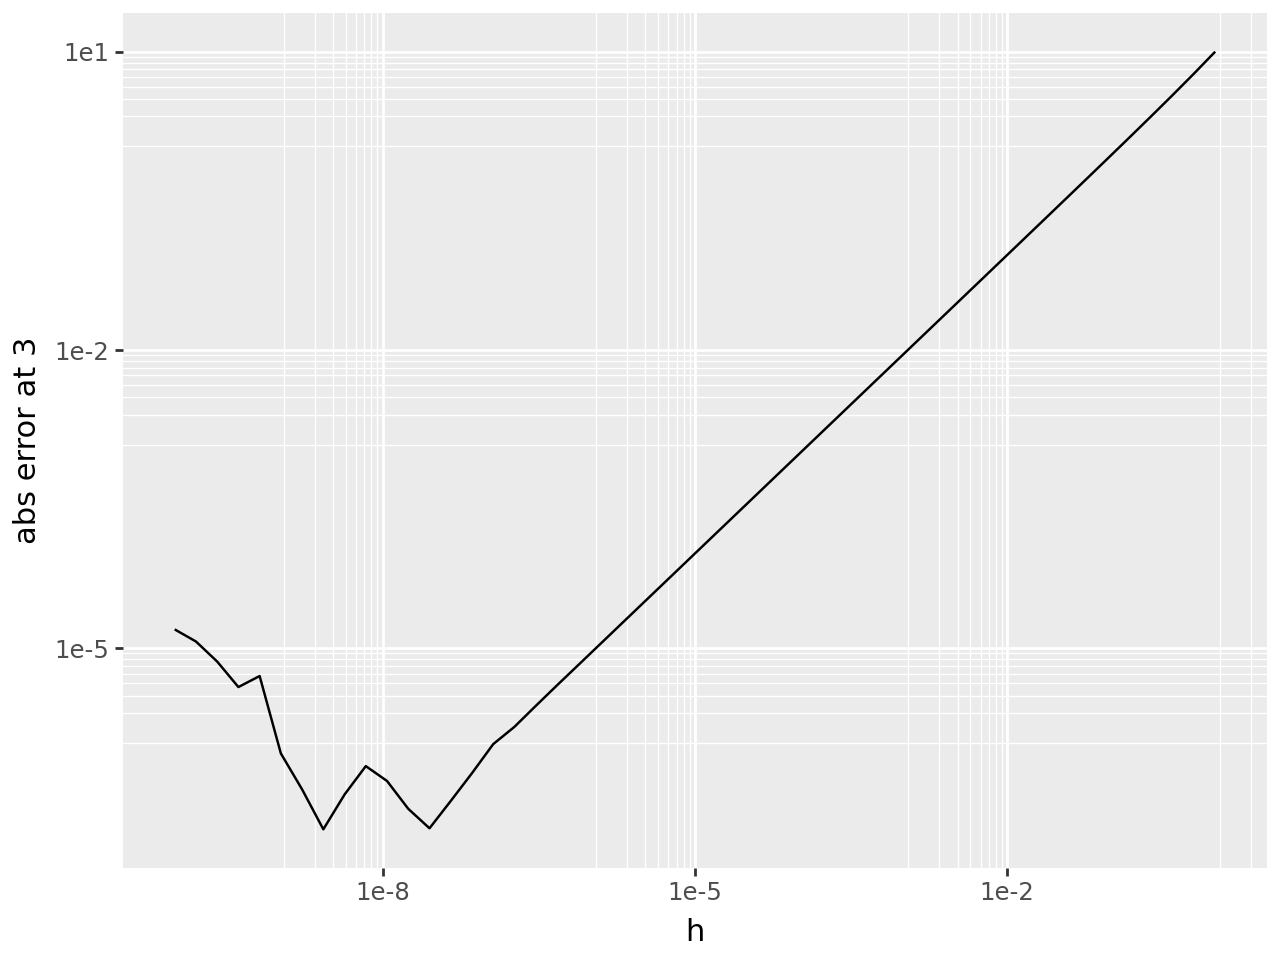

In [11]:
import numpy as np
import plotnine as p9
import pandas as pd

x0 = 3
h = np.logspace(-10, 0)
f = lambda x: x**3

error = abs(((f(x0 + h) - f(x0)) / h) - 3 * x0**2)

print(
    p9.ggplot(pd.DataFrame({"h": h, f"abs error at {x0}": error}))
    + p9.geom_line(p9.aes(x="h", y=f"abs error at {x0}"))
    + p9.scale_x_log10()
    + p9.scale_y_log10()
)

The reason use logspace and Log-Log Plotting is because the error is very small, using log is useful for exploring how the error changes over many orders, the patterns will then be more clear as the order goes down.  
When h gets smaller and smaller, the errors goes down as a constant rate as we expected. However when h is closed to 1e-8, the error starts to increase and decrease and increase again.  
The initial decrease in error occurs because the difference quotient is approximating the derivative actuall number. The increase-decrease-increase patterns might be cause by two kinds of error. When the first increase happens, one kinds of errors starts to increase but sooner it becomes less dominant compare to the decrease of truncation error. Then the increase is because of the floating error, the pricision is not enough and the error starts to increase.  
To give evidence to support your hypothesis, we noticed that at (a) the error starts roughly at 10e-16. For the formular we use to approximate, the error for the numerator and denominator is 10e-8, the total error is 10e-16 when h is closed to 10e-8, which is meet with the result we get at (a).

## Problem 3

In [12]:
def alg1(data):
  data = list(data)
  changes = True
  while changes:
    changes = False
    for i in range(len(data) - 1):
      if data[i + 1] < data[i]:
        data[i], data[i + 1] = data[i + 1], data[i]
        changes = True
  return data

def alg2(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(alg2(data[:split]))
    right = iter(alg2(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)
        

def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))

3a. Hypothesize the Operation

The algorithm is for sorting the list.

In [13]:
d1 = data1(5)
d2 = data2(5)
d3 = data3(5)

d1a1 = alg1(d1)
d1a2 = alg1(d1)
d2a1 = alg1(d2)
d2a2 = alg1(d2)
d3a1 = alg1(d3)
d3a2 = alg1(d3)

print(d1a1)
print(d2a1)
print(d3a1)

[31.0, 31.026, 31.07515666666667, 31.1456131764, 31.236317170692352]
[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]


3b. Explain the Algorithms

Alg1 scan the whole list and compare the adjacent elements, if the left element is larger than the right element then swap the two element. The sorting is done when no swaping is made. Alg2 split the list into two parts, and for each parts it split again until each parts only contains one elements. Then it merges two list with ascending orders and then merge back to complete the whole list.

3c. Performance Measurement and Analysis

100%|██████████| 10/10 [18:29<00:00, 110.98s/it]


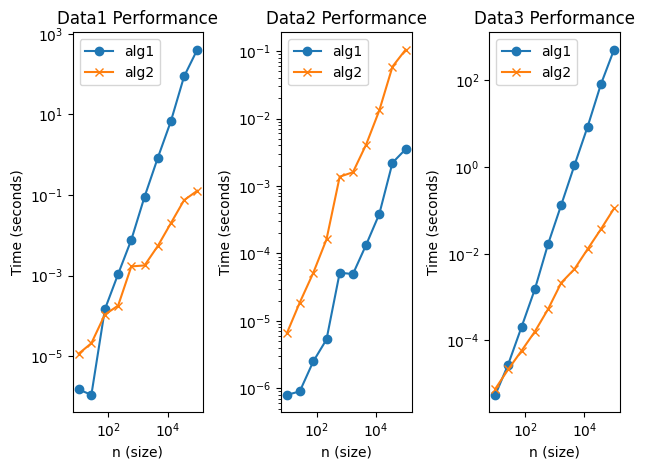

In [16]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

def time_algorithm(alg, data):
    start = time.perf_counter()
    alg(data)
    end = time.perf_counter()
    return end - start

sizes = np.logspace(1, 5, num=10, dtype=int) 
alg1_times_data1 = []
alg2_times_data1 = []
alg1_times_data2 = []
alg2_times_data2 = []
alg1_times_data3 = []
alg2_times_data3 = []

for size in tqdm(sizes):
    d1 = data1(size)
    d2 = data2(size)
    d3 = data3(size)
    
    alg1_times_data1.append(time_algorithm(alg1, d1))
    alg2_times_data1.append(time_algorithm(alg2, d1))
    
    alg1_times_data2.append(time_algorithm(alg1, d2))
    alg2_times_data2.append(time_algorithm(alg2, d2))
    
    alg1_times_data3.append(time_algorithm(alg1, d3))
    alg2_times_data3.append(time_algorithm(alg2, d3))


plt.subplot(1, 3, 1)
plt.loglog(sizes, alg1_times_data1, label="alg1", marker="o")
plt.loglog(sizes, alg2_times_data1, label="alg2", marker="x")
plt.title('Data1 Performance')
plt.xlabel('n (size)')
plt.ylabel('Time (seconds)')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(sizes, alg1_times_data2, label="alg1", marker="o")
plt.loglog(sizes, alg2_times_data2, label="alg2", marker="x")
plt.title('Data2 Performance')
plt.xlabel('n (size)')
plt.ylabel('Time (seconds)')
plt.legend()


plt.subplot(1, 3, 3)
plt.loglog(sizes, alg1_times_data3, label="alg1", marker="o")
plt.loglog(sizes, alg2_times_data3, label="alg2", marker="x")
plt.title('Data3 Performance')
plt.xlabel('n (size)')
plt.ylabel('Time (seconds)')
plt.legend()

plt.tight_layout()
plt.show()

3d.Conclusions and Recommendations  
For data1, alg2 performs better, the average time is lower. For data2, alg1 performs better than alg2 as it is already sorted data and no further action is needed. For data3 alg2 performs much better for it is reserved data and alg1 needs to do maximize operation.  
Overall, alg2 is recommend to used at any circumstance as it is much more constant and faster.

## Problem 4

4a. Implement the add Method  
4b. Implement a contains Method  
4c. Implement and Test a has_data Method   

In [44]:
class Tree:
    def __init__(self):
        self._value = None
        self._data = None
        self.left = None
        self.right = None

## 4a. Implement the add Method

    def add(self,value,data):
        if self._value == None:
            self._value = value
            self._data = data
        elif self._value < value: # go right

            if self.right is None:
                self.right = Tree()
            self.right.add(value,data)

        else:# go left

            if self.left is None:
                self.left = Tree()
            self.left.add(value,data)
    def __contains__(self, patient_id):
        if self._value == patient_id:
            return True
        elif self.left and patient_id < self._value:
            return patient_id in self.left
        elif self.right and patient_id > self._value:
            return patient_id in self.right
        else:
            return False
    
    def has_data(self,target):
        if self._data == target:
            return True
        if self.left:
            l = self.left.has_data(target)
        else:
            l = False
        if self.right:
            r = self.right.has_data(target)
        else:
            r = False
        return l or r




In [45]:
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

In [46]:
print(24601 in my_tree)
print(1492 in my_tree)

True
False


In [47]:
print(my_tree.has_data('JV'))
print(my_tree.has_data("JNY"))
print(my_tree.has_data("asd"))
print(my_tree.has_data(24601))

True
True
False
False


4d. Performance Analysis of __contains__ and has_data

100%|██████████| 6/6 [00:06<00:00,  1.13s/it]


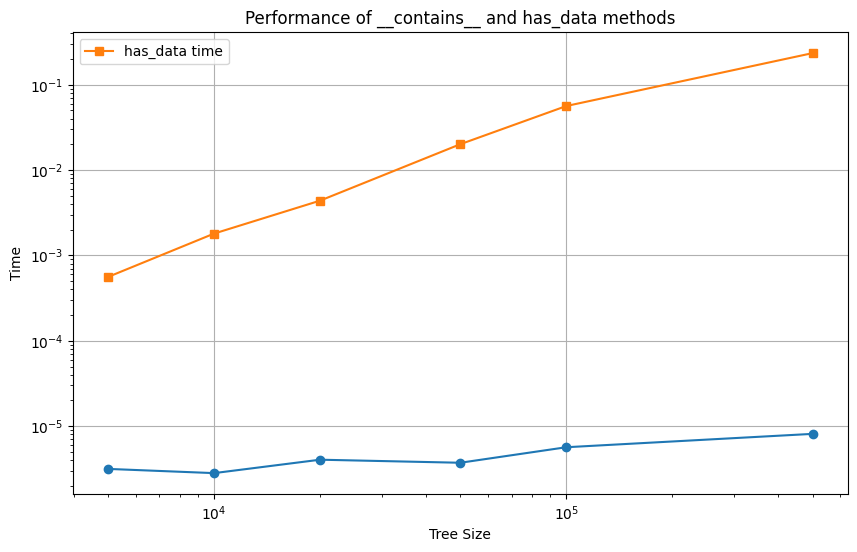

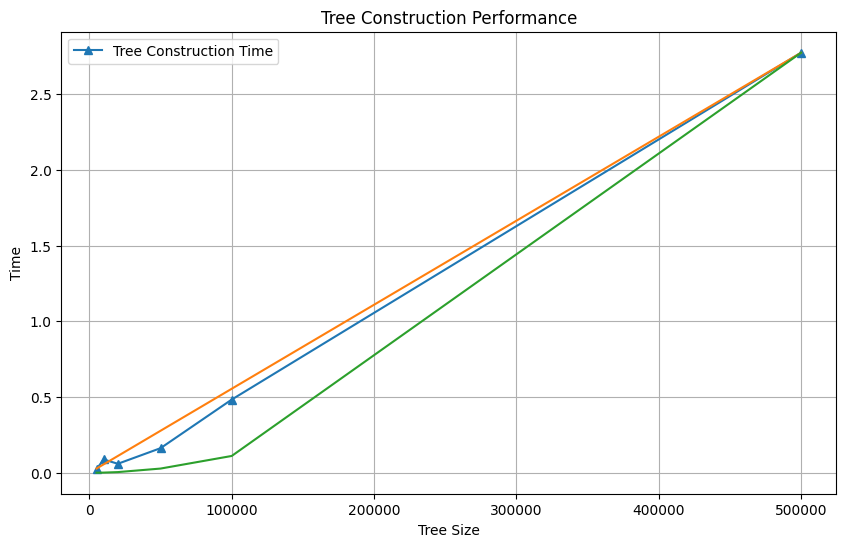

In [77]:
import random
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
large_tree = Tree()

ctime = []
htime = []
cotime = []

def test_contains():
    random_id = random.choice([random.choice(rd)[0],-1])# for false data
    return random_id in large_tree

def test_has_data():
    random_data = random.choice([random.choice(rd)[1],-1])
    return large_tree.has_data(random_data)



treesize = [5000,10000,20000,50000,100000,500000]
for tree_size in tqdm(treesize):

    a = time.perf_counter()
    rd = [(random.randint(1, 10000000), f"Data{str(i)}") for i in range(tree_size)]
    for patient_id, data in rd:
        large_tree.add(patient_id, data)
    b = time.perf_counter()
    cotime.append(b-a)

    a = time.perf_counter()
    for i in range(10):# get 10 average for a tree size
        _ = test_contains()
    b = time.perf_counter()
    ctime.append((b-a)/10)

    a = time.perf_counter()
    for i in range(10):# get 10 average for a tree size
        _ = test_has_data()
    b = time.perf_counter()
    htime.append((b-a)/10)
    
plt.figure(figsize=(10, 6))

# Plot __contains__ times
plt.plot(treesize, ctime, label="__contains__ time", marker='o')

# Plot has_data times
plt.plot(treesize, htime, label="has_data time", marker='s')

# Log-log scale for both axes
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Tree Size")
plt.ylabel("Time")
plt.title("Performance of __contains__ and has_data methods")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

# Plot tree construction times
on_curve = np.array(treesize) / max(treesize) * max(cotime)
on2_curve = []
for i in range(len(cotime)):
    on2_curve.append(treesize[i] **2 / max(treesize) **2*max(cotime))
plt.plot(treesize, cotime, label="Tree Construction Time", marker='^')
plt.plot(treesize,on_curve)
plt.plot(treesize,on2_curve)

plt.xlabel("Tree Size")
plt.ylabel("Time")
plt.title("Tree Construction Performance")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
on_curve = np.array(treesize) / max(treesize) * max(cotime)

250000000000

4e. Discussing Choice of Test Data 
Because using  a specific value doesn't capture the variability in tree structure or operation depth, leading to biased results. Binary search tree performance depends on data distribution and tree balance, so testing across a wide range of data ensures a comprehensive understanding of both best-case and worst-case scenarios. Also we need some false data to represent the case when whole tree needs to be traveled. More data also gives more constant result to avoid situation like the data is in the root node.

## Exercise 5: Discover data

1. the data is about drug-drug interaction, the dataset has recorded 130000 drug-drug pair with their SMILES sequence and the interaction they have
2. the dataset can be found at https://pubmed.ncbi.nlm.nih.gov/18048412
3. it has the license of CC BY 4.0
4. It is interesting because it can be implied with multiple method to analysis those data and it is meaningful to understand how to cooperate with the drug sequence.
5. First is how to clean and get attribute of the drug sequence. Second is can NLP method be used in those drug sequence to increase performance.